<a href="https://colab.research.google.com/github/AbhiPra24/oper_churn/blob/master/oper_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #Pandas is the most popular library for manipulating data. Think of it as an Excel but a million times faster and more practical.
from pandas import DataFrame
import numpy as np # This library allows to easily carry out simple and complex mathematical operations.
import matplotlib.pyplot as plt #Allows us to plot data, create graphs and visualize data. Perfect for your Powerpoint slides ;)
import sklearn #The one and only. This amazing library holds all the secrets. Containing powerful algorithms packed in a single line of code, this is where the magic will happen.
import sklearn.model_selection # more of sklearn. It is a big library, but trust me it is worth it.
import sklearn.preprocessing 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score,mean_absolute_error,mean_squared_error,precision_score,recall_score, accuracy_score,f1_score
from sklearn.utils import shuffle
import seaborn as sns


import random # Allows us to call random numbers, occasionally very useful.
from google.colab import files #Allows to upload and download files directly from the browser.
import pprint#Allows us to neatly display text
from collections import OrderedDict




#Classifiers Algorithms
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier


#Regression Algorithms
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import MultiTaskElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import orthogonal_mp
from sklearn.linear_model import BayesianRidge 
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data_url= ('https://github.com/busyML/Predictiong-Customer-Churn/raw/master/Telco_Customer_Churn.xlsx')

In [ ]:
# Here we simly use the 'pd.read_excel' command to open the excel file by simply calling the file's url where we uploaded it to.
data=pd.read_excel(data_url) 

# This allows us to look at the name of each column. Notice that now all our data is stored as the word 'data' and we can operate on it by using saying'data.(command)'
columnnames=data.columns 

print(columnnames) #Displays the names of our columns so that can start to get a feel for our datasheet

Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [ ]:
data.set_index('CustomerID', inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   Tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null 

In [ ]:
data.head(10)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
CustomerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes


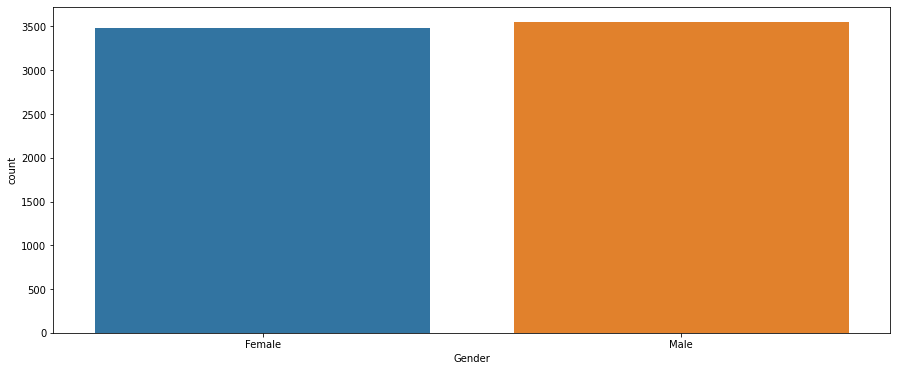

In [ ]:

plt.rcParams['figure.figsize']=(15,6)
sns.countplot(x="Gender", data=data)

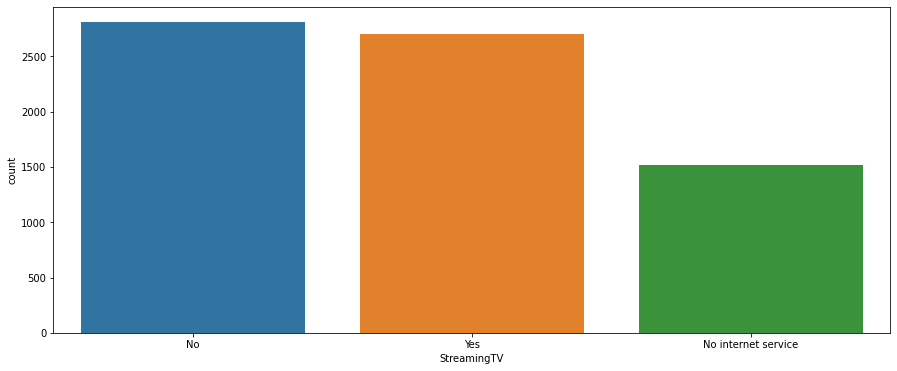

In [ ]:

plt.rcParams['figure.figsize']=(15,6)
sns.countplot(x="StreamingTV", data=data)

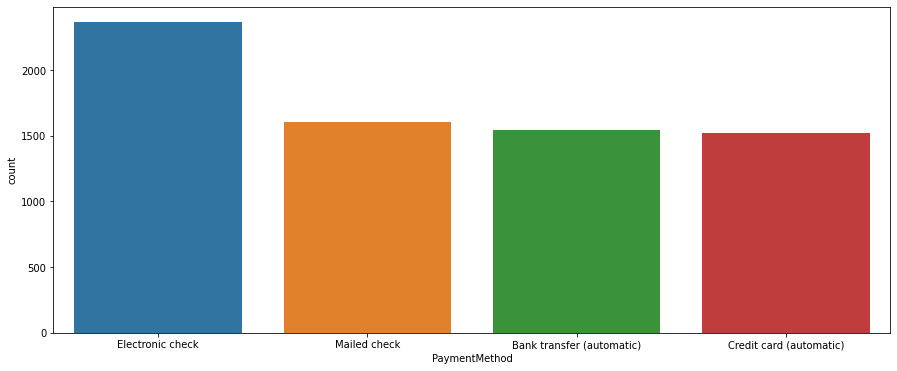

In [ ]:
import seaborn as sns
plt.rcParams['figure.figsize']=(15,6)
sns.countplot(x="PaymentMethod", data=data)

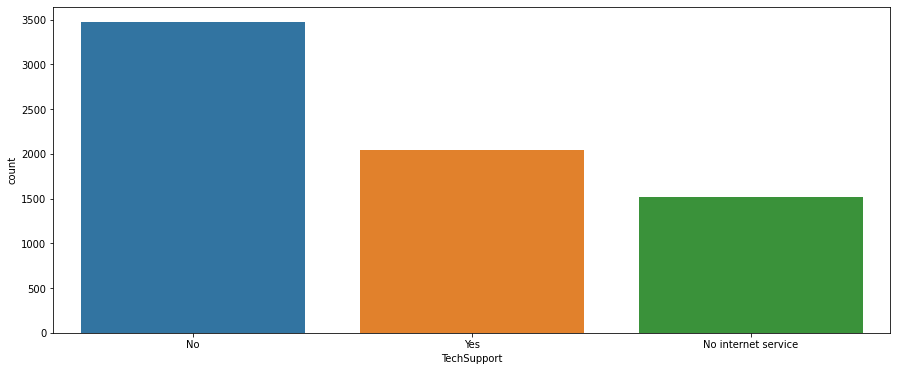

In [ ]:
import seaborn as sns
plt.rcParams['figure.figsize']=(15,6)
sns.countplot(x="TechSupport", data=data)

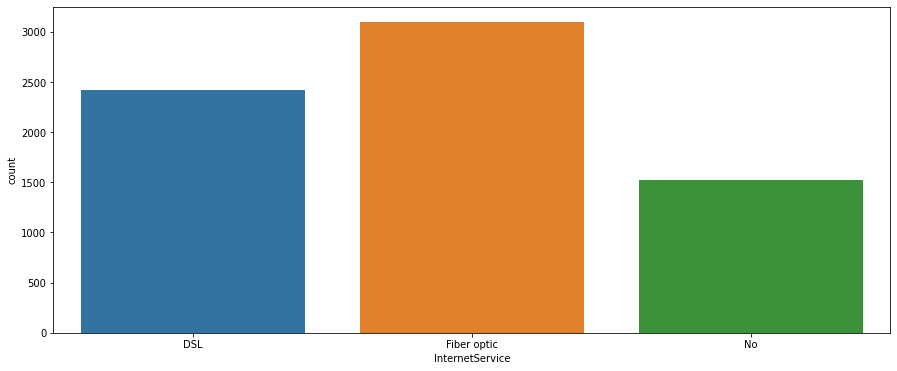

In [ ]:
import seaborn as sns
plt.rcParams['figure.figsize']=(15,6)
sns.countplot(x="InternetService", data=data)

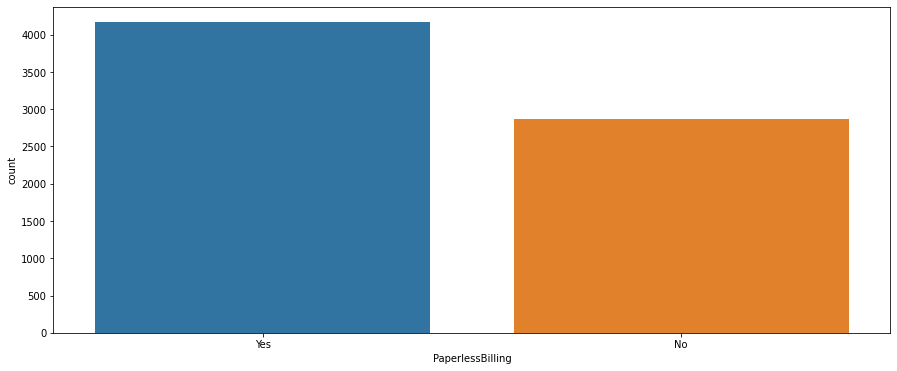

In [ ]:
import seaborn as sns
plt.rcParams['figure.figsize']=(15,6)
sns.countplot(x="PaperlessBilling", data=data)


In [ ]:
#the column 'Tenure' contains the number of months that the customer has been with the company. As we have said, we need to normalize it using this simple function. We are telling our code that this column ('Tenure') will now be equal this mean normalization operation.

data['Tenure']=(data['Tenure']-data['Tenure'].mean())/data['Tenure'].std() 

# Monthly charge is the amount in $ of how much the customer pays every month. We also need to normalize it.
data['MonthlyCharges']=(data['MonthlyCharges']-data['MonthlyCharges'].mean())/data['MonthlyCharges'].std()

# Total charge is the amount in $ that  the customer has paid throughout their life. It is the LTV for each customer. We also need to normalize it.
data['TotalCharges']=(data['TotalCharges']-data['TotalCharges'].mean())/data['TotalCharges'].std()

#Let's again print our first ten rows to see how the content of these three columns have changed.
data.head(10)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
CustomerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,-1.280157,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,-1.161611,-0.994123,No
5575-GNVDE,Male,0,No,No,0.064298,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,-0.260859,-0.173727,No
3668-QPYBK,Male,0,No,No,-1.239416,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,-0.363897,-0.959581,Yes
7795-CFOCW,Male,0,No,No,0.512450,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.747797,-0.195234,No
9237-HQITU,Female,0,No,No,-1.239416,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.196164,-0.940391,Yes
9305-CDSKC,Female,0,No,No,-0.994970,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1.158407,-0.645323,Yes
1452-KIOVK,Male,0,No,Yes,-0.424595,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),0.807745,-0.147302,No
6713-OKOMC,Female,0,No,No,-0.913487,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,-1.164935,-0.874107,No
7892-POOKP,Female,0,Yes,No,-0.180148,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,1.329583,0.336492,Yes


In [ ]:
#We use a conditional command to set all the values as 1s or 0s. You can read this function as "if the value of the cell is 'Yes' then change the cell value to 1, if not, change it to 0. Repeat for all cells of that column."

data['Churn']=data['Churn'].apply(lambda x:1 if x=='Yes' else 0) 

#Let's print out the first 10 rows of that particular column ['Churn'] to see what has happened to it.

print(data['Churn'].head(10))

CustomerID
7590-VHVEG    0
5575-GNVDE    0
3668-QPYBK    1
7795-CFOCW    0
9237-HQITU    1
9305-CDSKC    1
1452-KIOVK    0
6713-OKOMC    0
7892-POOKP    1
6388-TABGU    0
Name: Churn, dtype: int64


In [ ]:
data.head(10)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
CustomerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,-1.280157,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,-1.161611,-0.994123,0
5575-GNVDE,Male,0,No,No,0.064298,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,-0.260859,-0.173727,0
3668-QPYBK,Male,0,No,No,-1.239416,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,-0.363897,-0.959581,1
7795-CFOCW,Male,0,No,No,0.512450,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.747797,-0.195234,0
9237-HQITU,Female,0,No,No,-1.239416,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.196164,-0.940391,1
9305-CDSKC,Female,0,No,No,-0.994970,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1.158407,-0.645323,1
1452-KIOVK,Male,0,No,Yes,-0.424595,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),0.807745,-0.147302,0
6713-OKOMC,Female,0,No,No,-0.913487,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,-1.164935,-0.874107,0
7892-POOKP,Female,0,Yes,No,-0.180148,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,1.329583,0.336492,1


In [ ]:
data['Gender']=data['Gender'].apply(lambda x:1 if x=='Female' else 0) # Note here that unlike the other column, the keyword is "Female" not "Yes", however it is of course still binary class.
data['Partner']=data['Partner'].apply(lambda x:1 if x=='Yes' else 0)
data['Dependents']=data['Dependents'].apply(lambda x:1 if x=='Yes' else 0)
data['PhoneService']=data['PhoneService'].apply(lambda x:1 if x=='Yes' else 0)
data['MultipleLines']=data['MultipleLines'].apply(lambda x:1 if x=='Yes' else 0)
data['OnlineSecurity']=data['OnlineSecurity'].apply(lambda x:1 if x=='Yes' else 0)
data['OnlineBackup']=data['OnlineBackup'].apply(lambda x:1 if x=='Yes' else 0)
data['DeviceProtection']=data['DeviceProtection'].apply(lambda x:1 if x=='Yes' else 0)
data['TechSupport']=data['TechSupport'].apply(lambda x:1 if x=='Yes' else 0)
data['StreamingTV']=data['StreamingTV'].apply(lambda x:1 if x=='Yes' else 0)
data['StreamingMovies']=data['StreamingMovies'].apply(lambda x:1 if x=='Yes' else 0)
data['PaperlessBilling']=data['PaperlessBilling'].apply(lambda x:1 if x=='Yes' else 0)
# Let's again print out our 10 first rows to see what the data now looks like.

data.head(10)



,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
CustomerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,0,1,0,-1.280157,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,-1.161611,-0.994123,0
5575-GNVDE,0,0,0,0,0.064298,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,-0.260859,-0.173727,0
3668-QPYBK,0,0,0,0,-1.239416,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,-0.363897,-0.959581,1
7795-CFOCW,0,0,0,0,0.512450,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),-0.747797,-0.195234,0
9237-HQITU,1,0,0,0,-1.239416,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,0.196164,-0.940391,1
9305-CDSKC,1,0,0,0,-0.994970,1,1,Fiber optic,0,0,1,0,1,1,Month-to-month,1,Electronic check,1.158407,-0.645323,1
1452-KIOVK,0,0,0,1,-0.424595,1,1,Fiber optic,0,1,0,0,1,0,Month-to-month,1,Credit card (automatic),0.807745,-0.147302,0
6713-OKOMC,1,0,0,0,-0.913487,0,0,DSL,1,0,0,0,0,0,Month-to-month,0,Mailed check,-1.164935,-0.874107,0
7892-POOKP,1,0,1,0,-0.180148,1,1,Fiber optic,0,0,1,1,1,1,Month-to-month,1,Electronic check,1.329583,0.336492,1


In [ ]:
# This handy command ".value_counts()" give us all the different values of the ['InternetService'] column and the number of times they appear.

data['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [ ]:
# This handy command ".value_counts()" give us all the different values of the ['InternetService'] column and the number of times they appear.

data['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [ ]:
# This takes all the different values (here denominated as 'keys') of the column ['InternetService']
# Here we iteratively create one new column for each value of the ['InternetService'] column. 
#In this particular case, we will be creating three new columns, whose values will either be 1 or 0 based on whether the original column contained that value or not.

for x in data['InternetService'].value_counts().keys(): 
      data[x]=data['InternetService'].apply(lambda d: 1 if d==x else 0)
    
# As discussed previously, we now ditch the original column ['InternetService'], we now longer need it!    
data.drop(columns=['InternetService'], inplace=True)


# As always let's have a look at what our datasheet now looks like. The new columns are the last three !
data.head(10)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Fiber optic,DSL,No
CustomerID,,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,0,1,0,-1.280157,0,0,0,1,0,0,0,0,Month-to-month,1,Electronic check,-1.161611,-0.994123,0,0,1,0
5575-GNVDE,0,0,0,0,0.064298,1,0,1,0,1,0,0,0,One year,0,Mailed check,-0.260859,-0.173727,0,0,1,0
3668-QPYBK,0,0,0,0,-1.239416,1,0,1,1,0,0,0,0,Month-to-month,1,Mailed check,-0.363897,-0.959581,1,0,1,0
7795-CFOCW,0,0,0,0,0.512450,0,0,1,0,1,1,0,0,One year,0,Bank transfer (automatic),-0.747797,-0.195234,0,0,1,0
9237-HQITU,1,0,0,0,-1.239416,1,0,0,0,0,0,0,0,Month-to-month,1,Electronic check,0.196164,-0.940391,1,1,0,0
9305-CDSKC,1,0,0,0,-0.994970,1,1,0,0,1,0,1,1,Month-to-month,1,Electronic check,1.158407,-0.645323,1,1,0,0
1452-KIOVK,0,0,0,1,-0.424595,1,1,0,1,0,0,1,0,Month-to-month,1,Credit card (automatic),0.807745,-0.147302,0,1,0,0
6713-OKOMC,1,0,0,0,-0.913487,0,0,1,0,0,0,0,0,Month-to-month,0,Mailed check,-1.164935,-0.874107,0,0,1,0
7892-POOKP,1,0,1,0,-0.180148,1,1,0,0,1,1,1,1,Month-to-month,1,Electronic check,1.329583,0.336492,1,1,0,0


In [ ]:
data['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [ ]:
#Getting the value within the original columns
for x in data['Contract'].value_counts().keys():
    data[x]=data['Contract'].apply(lambda d: 1 if d==x else 0)#Creating the new columns, containing either 1s or 0s
    
data.drop(columns=['Contract'], inplace=True) # delete the original column

In [ ]:
data['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

In [ ]:
for x in data['PaymentMethod'].value_counts().keys():#Getting the value within the original columns
    data[x]=data['PaymentMethod'].apply(lambda d: 1 if d==x else 0)#Creating the new columns, containing either 1s or 0s
    
data.drop(columns=['PaymentMethod'], inplace=True) # delete the original column

#Let's now have a look a our data:
data.head(10)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Fiber optic,DSL,No,Month-to-month,Two year,One year,Electronic check,Mailed check,Bank transfer (automatic),Credit card (automatic)
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,0,1,0,-1.280157,0,0,0,1,0,0,0,0,1,-1.161611,-0.994123,0,0,1,0,1,0,0,1,0,0,0
5575-GNVDE,0,0,0,0,0.064298,1,0,1,0,1,0,0,0,0,-0.260859,-0.173727,0,0,1,0,0,0,1,0,1,0,0
3668-QPYBK,0,0,0,0,-1.239416,1,0,1,1,0,0,0,0,1,-0.363897,-0.959581,1,0,1,0,1,0,0,0,1,0,0
7795-CFOCW,0,0,0,0,0.512450,0,0,1,0,1,1,0,0,0,-0.747797,-0.195234,0,0,1,0,0,0,1,0,0,1,0
9237-HQITU,1,0,0,0,-1.239416,1,0,0,0,0,0,0,0,1,0.196164,-0.940391,1,1,0,0,1,0,0,1,0,0,0
9305-CDSKC,1,0,0,0,-0.994970,1,1,0,0,1,0,1,1,1,1.158407,-0.645323,1,1,0,0,1,0,0,1,0,0,0
1452-KIOVK,0,0,0,1,-0.424595,1,1,0,1,0,0,1,0,1,0.807745,-0.147302,0,1,0,0,1,0,0,0,0,0,1
6713-OKOMC,1,0,0,0,-0.913487,0,0,1,0,0,0,0,0,0,-1.164935,-0.874107,0,0,1,0,1,0,0,0,1,0,0
7892-POOKP,1,0,1,0,-0.180148,1,1,0,0,1,1,1,1,1,1.329583,0.336492,1,1,0,0,1,0,0,1,0,0,0


In [ ]:
#Using the ".to_excel" command to create a .xlsx file containing the newly formatted"data".
#data.to_excel('Telco_Churn_Formatted_For_ML.xlsx')


#The command that allows us to download the data from the browser.
#files.download('Telco_Churn_Formatted_For_ML.xlsx')

In [ ]:
#creating our x datasheet, which contains all our data except for the ['Churn'] column.
x=data.drop(columns='Churn')


#The ['Churn'] column extracted.
y=data['Churn']

y.head(10)

CustomerID
7590-VHVEG    0
5575-GNVDE    0
3668-QPYBK    1
7795-CFOCW    0
9237-HQITU    1
9305-CDSKC    1
1452-KIOVK    0
6713-OKOMC    0
7892-POOKP    1
6388-TABGU    0
Name: Churn, dtype: int64

In [ ]:
# We create an iterative operation ( also known as a "For Loop") to get the correlation between each column and the churn metric (y))

for columnname in x.columns: 
    print('The Correlation Between',columnname,'and Churn is:', abs(x[columnname].corr(y)))
    
#the outcome of the operation is to print out the correlation coefficient along with a text for clarity purpose.
#we use the ".corr()" command to calculate the correlation and the "abs" to always return a positive number, we don't care whether the correlation is negative or positive, we just want to check that there is one!

The Correlation Between Gender and Churn is: 0.008544643224946458
The Correlation Between SeniorCitizen and Churn is: 0.15054105341568094
The Correlation Between Partner and Churn is: 0.1499819256200587
The Correlation Between Dependents and Churn is: 0.16312843938822044
The Correlation Between Tenure and Churn is: 0.35404935895325046
The Correlation Between PhoneService and Churn is: 0.011691398865421365
The Correlation Between MultipleLines and Churn is: 0.04003273987252132
The Correlation Between OnlineSecurity and Churn is: 0.1712699235334987
The Correlation Between OnlineBackup and Churn is: 0.08230696876508198
The Correlation Between DeviceProtection and Churn is: 0.06619251684228528
The Correlation Between TechSupport and Churn is: 0.1647159083441067
The Correlation Between StreamingTV and Churn is: 0.0632539802751934
The Correlation Between StreamingMovies and Churn is: 0.06085993668145853
The Correlation Between PaperlessBilling and Churn is: 0.19145432108004626
The Correlatio

In [ ]:
#We create the Decision Tree algorithm, simply by loading it from the Sklearn library in a single line.

feature_importance_indicator=ExtraTreesClassifier(n_estimators = 100)

#Then we ask this algorithm, now dubbed as "feature_importance_indicator", to learn from our data x ( the indicators) and y( the churn outcome):

feature_importance_indicator.fit(x,y)

#We then ask the model politely to create a list of which columns it learnt the most from and which columns didn't help it at all, for this we use the "feature_importances_" command:

importance_dict= dict(zip(x.columns, (feature_importance_indicator.feature_importances_)))

#We sort the list in descending order so that it is quicker to analyse.

importance_dict_sorted= OrderedDict(sorted(importance_dict.items(), key=lambda x:x[1],reverse=1))

#The "pprint" commnad allows us to print things out nicely.

pprint.pprint(importance_dict_sorted) 




OrderedDict([('TotalCharges', 0.14872338108352276),
             ('Tenure', 0.13989188238514805),
             ('MonthlyCharges', 0.13082534090010384),
             ('Month-to-month', 0.061165864714755026),
             ('Fiber optic', 0.03903544982520922),
             ('Gender', 0.038286209500092164),
             ('Electronic check', 0.033534755436983595),
             ('Two year', 0.03324098413917482),
             ('Partner', 0.03131150736102159),
             ('PaperlessBilling', 0.030886630859320006),
             ('OnlineBackup', 0.027438848728084903),
             ('OnlineSecurity', 0.026346001141705794),
             ('SeniorCitizen', 0.02600829384063179),
             ('DeviceProtection', 0.02557169773891943),
             ('Dependents', 0.024999476079484058),
             ('MultipleLines', 0.02478484703236146),
             ('TechSupport', 0.024598526787751016),
             ('StreamingMovies', 0.023717477450504468),
             ('StreamingTV', 0.02233373898197281),
      

In [ ]:
# with the ".drop" command, we can delete the columns we have deemed unnecessary.
x.drop(columns=['Gender','PhoneService','MultipleLines','OnlineBackup','DeviceProtection','StreamingTV','StreamingMovies'],inplace=True)

In [ ]:
#Let's print our final data
x.head(10)

,SeniorCitizen,Partner,Dependents,Tenure,OnlineSecurity,TechSupport,PaperlessBilling,MonthlyCharges,TotalCharges,Fiber optic,DSL,No,Month-to-month,Two year,One year,Electronic check,Mailed check,Bank transfer (automatic),Credit card (automatic)
CustomerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,0,-1.280157,0,0,1,-1.161611,-0.994123,0,1,0,1,0,0,1,0,0,0
5575-GNVDE,0,0,0,0.064298,1,0,0,-0.260859,-0.173727,0,1,0,0,0,1,0,1,0,0
3668-QPYBK,0,0,0,-1.239416,1,0,1,-0.363897,-0.959581,0,1,0,1,0,0,0,1,0,0
7795-CFOCW,0,0,0,0.512450,1,1,0,-0.747797,-0.195234,0,1,0,0,0,1,0,0,1,0
9237-HQITU,0,0,0,-1.239416,0,0,1,0.196164,-0.940391,1,0,0,1,0,0,1,0,0,0
9305-CDSKC,0,0,0,-0.994970,0,0,1,1.158407,-0.645323,1,0,0,1,0,0,1,0,0,0
1452-KIOVK,0,0,1,-0.424595,0,0,1,0.807745,-0.147302,1,0,0,1,0,0,0,0,0,1
6713-OKOMC,0,0,0,-0.913487,1,0,0,-1.164935,-0.874107,0,1,0,1,0,0,0,1,0,0
7892-POOKP,0,1,0,-0.180148,0,1,1,1.329583,0.336492,1,0,0,1,0,0,1,0,0,0


In [ ]:
# We use the "train_test_split" command to seperate our data into "training" and "testing". The "test_size" variable allows to decide how much of the data we will keep for testing, in this case we do a conventional 80-20 split. 
#Random state shuffles the data, which is allows good practice. The number 18 just allows to shuffle the data the same way every time the code is executed, important for reproducability.
x_training, x_testing, y_training, y_testing = train_test_split(x, y, test_size=0.2, random_state=18)




In [ ]:
# We load the Algorithm from the library and give the name of "logistic_regression"
logistic_regression= LogisticRegression()



In [ ]:
logistic_regression.fit(x_training,y_training)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#We initialize the following variables that help us count the number of True Positives, False Positives, etc.
TP=0
FP=0
TN=0
FN=0


#We use a loop to count the number of TN, TP, TN, FN. Each time we detech one, we add a '1' to the corresponding variable
for i in range(len(x_testing)):
  
    if logistic_regression.predict(x_testing.iloc[[i,]])==1 and y_testing.iloc[i]==1:
                                       TP=TP+1
    if logistic_regression.predict(x_testing.iloc[[i,]])==1 and y_testing.iloc[i]==0:
                                       FP=FP+1      
    if logistic_regression.predict(x_testing.iloc[[i,]])==0 and y_testing.iloc[i]==0:
                                      TN=TN+1    
                                      
    if logistic_regression.predict(x_testing.iloc[[i,]])==0 and y_testing.iloc[i]==1:
                                       FN=FN+1   
#Printing our results
print ("Logistic Regression", "True Positives:",TP, "False Positives:",FP,"True Negatives:",TN , "False Negatives:", FN) 


#Calculating the 'Recall' metric with this simple formula
log_recall=TP/(TP+FN)

#Printing our the 'Recall' metric in %
print("Logistic Regression Recall On Training Data:", log_recall *100,'%')



Logistic Regression True Positives: 187 False Positives: 99 True Negatives: 947 False Negatives: 174
Logistic Regression Recall On Training Data: 51.8005540166205 %


In [ ]:
#we initialize a class weights for our two labels : 1 (churned) and 0 (churned) at 70-30

class_weights ={1: 0.70, 0: 0.30}

#we create a new logistic regression model optimized for a better recall and retrain it on our data
logistic_regression_opt= LogisticRegression(class_weight=class_weights)
logistic_regression_opt.fit(x_training,y_training)

LogisticRegression(C=1.0, class_weight={0: 0.3, 1: 0.7}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
TP=0
TN=0
FP=0
FN=0

for i in range(len(x_testing)):
    if logistic_regression_opt.predict(x_testing.iloc[[i,]])==1 and y_testing.iloc[i]==1:
                                       TP=TP+1
    if logistic_regression_opt.predict(x_testing.iloc[[i,]])==1 and y_testing.iloc[i]==0:
                                       FP=FP+1      
    if logistic_regression_opt.predict(x_testing.iloc[[i,]])==0 and y_testing.iloc[i]==0:
                                       TN=TN+1    
                                       
    if logistic_regression_opt.predict(x_testing.iloc[[i,]])==0 and y_testing.iloc[i]==1:
                                       FN=FN+1   

print ("Logistic Regression", "True Positives:",TP, "False Positives:",FP,"True Negatives:",TN , "False Negatives:", FN) 

log_recall=TP/(TP+FN)

print("Logistic Regression Recall On Training Data:", log_recall *100,'%')


Logistic Regression True Positives: 274 False Positives: 254 True Negatives: 792 False Negatives: 87
Logistic Regression Recall On Training Data: 75.90027700831024 %


In [ ]:
#Update the weights to 85-15%
class_weights ={1: 0.85, 0: 0.15}

#Retrain the algorithm
logistic_regression_opt= LogisticRegression(class_weight=class_weights)
logistic_regression_opt.fit(x_training,y_training)


LogisticRegression(C=1.0, class_weight={0: 0.15, 1: 0.85}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Re-evaluating the model on the 85-15 split.

TP=0
TN=0
FP=0
FN=0

for i in range(len(y_testing)):
  
    if logistic_regression_opt.predict(x_testing.iloc[[i,]])==1 and y_testing.iloc[i]==1:
                                       TP=TP+1
    if logistic_regression_opt.predict(x_testing.iloc[[i,]])==1 and y_testing.iloc[i]==0:
                                       FP=FP+1      
    if logistic_regression_opt.predict(x_testing.iloc[[i,]])==0 and y_testing.iloc[i]==0:
                                       TN=TN+1    
                                       
    if logistic_regression_opt.predict(x_testing.iloc[[i,]])==0 and y_testing.iloc[i]==1:
                                       FN=FN+1   

print ("Logistic Regression", "True Positives:",TP, "False Positives:",FP,"True Negatives:",TN , "False Negatives:", FN) 

log_recall=TP/(TP+FN)

print("Logistic Regression Recall On Training Data:", log_recall *100,'%')



Logistic Regression True Positives: 331 False Positives: 448 True Negatives: 598 False Negatives: 30
Logistic Regression Recall On Training Data: 91.68975069252078 %


In [ ]:

#These prompts will ask the customer representative to type in the answers so that we can collect the data we need to know so that we can predict their churn
sen_citizen = input ("Is this customer Over 65 Years Old? (Yes/No)")
partner = input ("Is this customer Maried? (Yes/No)")
depend=input("Does this customer have children? (Yes/No)")
tenure= int(input("How many months has the customer been with the company "))# We use the 'int' command to turn the input into a whole number (integer)
online_security=input("Does the customer use the ""Online Security"" Service? ")
tech_support=input("Does the customer use the ""Tech Support "" Service? (Yes/No)")
pplerless_billing=input("Does the customer pay their bills online (Yes/No)" )
month_charges=float(input('How Much Does the Customer Pay Every Month? '))#We use the 'float' command to turn the input into a decimal number.
total_charges= float(input('How much has the customer spent in their entire history with the company?'))
internet_type=input("What type of Internet Service does the customer have ?(Fiber optic/DSL/ No internet)")
contract_type=input("How often does the customer pay?(Month-to-month/ Every year/ Every two years)")
payment_type=input('How does the customer pay? (E-check/Mailed check/Bank transfer/Credit card)')




Is this customer Over 65 Years Old? (Yes/No)Yes
Is this customer Maried? (Yes/No)Yes
Does this customer have children? (Yes/No)yes
How many months has the customer been with the company 10
Does the customer use the Online Security Service? yes
Does the customer use the Tech Support  Service? (Yes/No)no
Does the customer pay their bills online (Yes/No)yes
How Much Does the Customer Pay Every Month? 1000
How much has the customer spent in their entire history with the company?10
What type of Internet Service does the customer have ?(Fiber optic/DSL/ No internet)dsl
How often does the customer pay?(Month-to-month/ Every year/ Every two years)every year
How does the customer pay? (E-check/Mailed check/Bank transfer/Credit card)bank transfer


In [ ]:
#Mean Normalization. First we need to reload our original data to get our original means and standard deviations.

original_data=pd.read_excel(data_url)

tenure_formatted= (tenure-original_data['Tenure'].mean())/original_data['Tenure'].std()
month_charges_formatted= (month_charges-original_data['MonthlyCharges'].mean())/original_data['MonthlyCharges'].std()
total_charges_formatted= (total_charges-original_data['TotalCharges'].mean())/original_data['TotalCharges'].std()


#Next, following the same process, we carry out Label Encoding ( turning 'Yes' into 1s and 'No' into 0s)
if sen_citizen=='Yes':
  sen_citizen_formatted=1
else:
  sen_citizen_formatted=0

if partner=='Yes':
  partner_formatted=1
else:
  partner_formatted=0
  
if depend=='Yes':
  depend_formatted=1
else:
  depend_formatted=0

if online_security=='Yes':
  online_security_formatted=1
else:
  online_security_formatted=0
  
if tech_support=='Yes':
  tech_support_formatted=1
else:
  tech_support_formatted=0
  
if pplerless_billing=='Yes':
  pplerless_billing_formatted=1
else:
  pplerless_billing_formatted=0

#finally, we will do one hot encoding for the input with mutliple options. 

#create three columns, all at zero to begin with.
fiber_optic_formatted=0
dsl_formatted=0
no_internet_formatted=0

#According to the input received, one of the three variable will have to change to '1' correspondingly, while the other stay at zero.

if internet_type=='Fiber optic':
  fiber_optic_formatted=1
  
if internet_type=='DSL':
  dsl_formatted=1
  
if internet_type=='No internet':
  no_internet_formatted=1


#We repeat with the other two multiple option inputs


month_to_month_contract=0
one_year_contract=0
two_year_contract=0

if contract_type=='Month-to-month':
  month_to_month_contract=1
  
if contract_type=='Every year':
  one_year_contract=1
  
  
if contract_type=='Every two years':
  two_year_contract=1
  
e_check_formatted=0
mail_check_formatted=0
bank_transfer_formatted=0
credit_card_formatted=0

if payment_type=='E-check':
  e_check_formatted=1
  
if payment_type=='Mailed check':
  mail_check_formatted=1

if payment_type=='Bank transfer':
  bank_transfer_formatted=1
  
if payment_type=='Credit card':
  credit_card_formatted=1

  





In [ ]:
x.columns



Index(['SeniorCitizen', 'Partner', 'Dependents', 'Tenure', 'OnlineSecurity',
       'TechSupport', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Fiber optic', 'DSL', 'No', 'Month-to-month', 'Two year', 'One year',
       'Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'],
      dtype='object')

In [ ]:
#Creating a row containing all the new inputted data that follows the same order as in our training and testing datasets

formatted_inputs_for_prediction= [[sen_citizen_formatted,partner_formatted,depend_formatted,tenure_formatted, online_security_formatted,tech_support_formatted,
                                  pplerless_billing_formatted, month_charges_formatted, total_charges_formatted, fiber_optic_formatted,dsl_formatted,
                                  no_internet_formatted,month_to_month_contract,one_year_contract,two_year_contract,e_check_formatted,mail_check_formatted,
                                  bank_transfer_formatted, credit_card_formatted]]

#Printing these formatted inputs to make sure they look good
print(formatted_inputs_for_prediction)

[[1, 1, 0, -0.9134874263371422, 0, 0, 0, 31.084311759795604, -1.0028803429708502, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


In [ ]:
prediction = logistic_regression_opt.predict(formatted_inputs_for_prediction)

print(prediction)

if prediction == 1:
  print('This customer is likely to churn! ')
else:
  print('It is unlikely that this customer will churn.')

[1]
This customer is likely to churn! 
